#### Large RAM is required to load the larger models. Running on GPU can optimize inference speed.

In [1]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="oM8qjezJVTxKQnGTuBzP")
project = rf.workspace("abdelaadimkhriss").project("ocean-plastics-waste-detection-float-plastics")
version = project.version(8)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 39.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Ocean-Plastics-Waste-Detection---Float-Plastics-8 in yolov11:: 100%|██████████| 3856/3856 [00:00<00:00, 6416.54it/s]


In [2]:
import sys
if 'google.colab' in sys.modules:
    print('Running in Colab.')
    !pip3 install salesforce-lavis

Running in Colab.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 10.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import torch
from PIL import Image
import requests
from lavis.models import load_model_and_preprocess

/usr/local/lib/python3.11/dist-packages/fairscale/experimental/nn/offload.py:19: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  return torch.cuda.amp.custom_fwd(orig_func)  # type: ignore
/usr/local/lib/python3.11/dist-packages/fairscale/experimental/nn/offload.py:30: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  return torch.cuda.amp.custom_bwd(orig_func)  # type: ignore


#### Load an example image

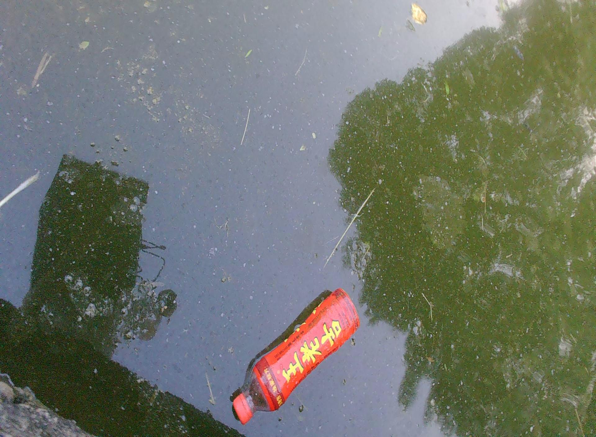

In [ ]:
img_url = '/content/Ocean-Plastics-Waste-Detection---Float-Plastics-8/test/images/0059_jpg.rf.52f86f18bdf7b494cdb44c2494606e76.jpg'

# Open the image correctly
raw_image = Image.open(img_url).convert('RGB')

# Resize and display the image
display(raw_image.resize((596, 437)))

In [3]:
# setup device to use
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"

#### Load pretrained/finetuned BLIP2 captioning model

In [4]:
# we associate a model with its preprocessors to make it easier for inference.
model, vis_processors, _ = load_model_and_preprocess(
    name="blip2_t5", model_type="pretrain_flant5xxl", is_eval=True, device=device
)

# Other available models:
#
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_opt", model_type="pretrain_opt2.7b", is_eval=True, device=device
# )
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_opt", model_type="pretrain_opt6.7b", is_eval=True, device=device
# )
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_opt", model_type="caption_coco_opt2.7b", is_eval=True, device=device
# )
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_opt", model_type="caption_coco_opt6.7b", is_eval=True, device=device
# )
#
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_t5", model_type="pretrain_flant5xl", is_eval=True, device=device
# )
#
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_t5", model_type="caption_coco_flant5xl", is_eval=True, device=device
# )

vis_processors.keys()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

100%|██████████| 1.89G/1.89G [00:48<00:00, 42.0MB/s]
/usr/local/lib/python3.11/dist-packages/lavis/models/eva_vit.py:433: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/674 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/53.0k [00:00<?, ?B/s]

model-00001-of-00005.safetensors:   0%|          | 0.00/9.45G [00:00<?, ?B/s]

model-00002-of-00005.safetensors:   0%|          | 0.00/9.60G [00:00<?, ?B/s]

model-00003-of-00005.safetensors:   0%|          | 0.00/9.96G [00:00<?, ?B/s]

model-00004-of-00005.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

model-00005-of-00005.safetensors:   0%|          | 0.00/6.06G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

100%|██████████| 413M/413M [00:13<00:00, 31.5MB/s]
/usr/local/lib/python3.11/dist-packages/lavis/models/blip2_models/blip2.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.

dict_keys(['train', 'eval'])

#### prepare the image as model input using the associated processors

In [ ]:
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

#### generate caption using beam search

In [ ]:
model.generate({"image": image})

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


['a bottle is floating in a body of water']

#### generate multiple captions using nucleus sampling

In [ ]:
# due to the non-determinstic nature of necleus sampling, you may get different captions.
model.generate({"image": image}, use_nucleus_sampling=True, num_captions=3)

['a bottle is floating in a body of water',
 'a can of soda is floating in a body of water',
 'a can of soda is floating in a body of water']

#### instructed zero-shot vision-to-language generation

In [ ]:
model.generate({"image": image, "prompt": "Question: which type of plastic is this and its impact on ocean? Answer:"})

['polystyrene (styrofoam)']

In [ ]:
model.generate({"image": image, "prompt": "Question: what is impact of plastic found in this image if any in ocean? Answer:"})

['plastic is a non-biodegradable, non-degradable, non-biodegradable, non-biodegradable']

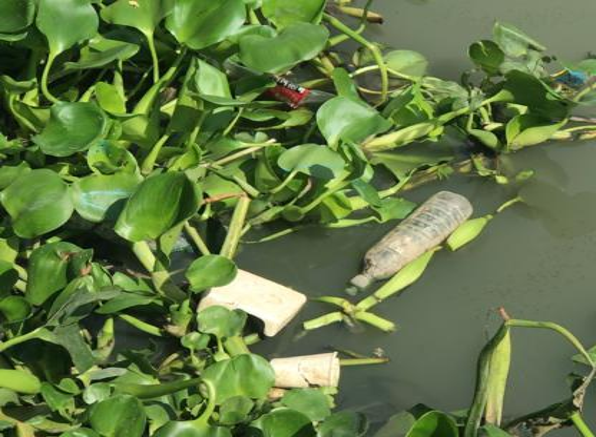

In [ ]:
img_url = '/content/Ocean-Plastics-Waste-Detection---Float-Plastics-8/test/images/r104_PNG_jpg.rf.e55cdbc479143e05d5fa483c0e56419c.jpg'

# Open the image correctly
raw_image = Image.open(img_url).convert('RGB')

# Resize and display the image
display(raw_image.resize((596, 437)))

In [ ]:
# due to the non-determinstic nature of necleus sampling, you may get different captions.
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
model.generate({"image": image}, use_nucleus_sampling=True, num_captions=3)

['a plastic bottle is floating in a body of water',
 'a bottle is floating in a body of water',
 'a lot of plants in the water']

In [ ]:
model.generate({"image": image, "prompt": "Question: what is impact of plastic found in this image if any in ocean? Answer:"})

['plastic is a non biodegradable, non biodegradable, non biodegradable, non biodegradable, non bio']

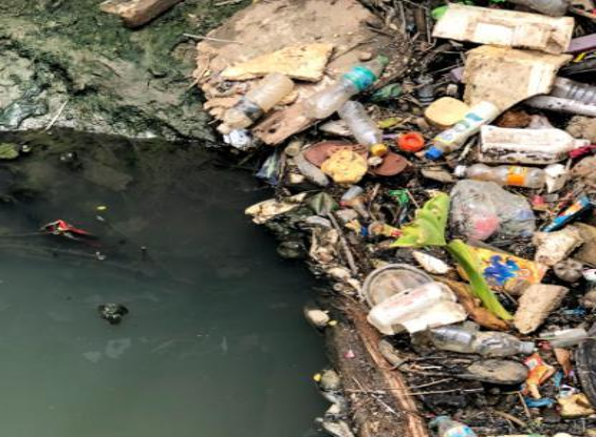

['a river filled with trash and garbage',
 'a river filled with trash and garbage',
 'a river filled with trash and garbage']

In [ ]:
img_url = '/content/Ocean-Plastics-Waste-Detection---Float-Plastics-8/test/images/r470_PNG_jpg.rf.5f5d7e39badd19616ce79262fd625a12.jpg'

# Open the image correctly
raw_image = Image.open(img_url).convert('RGB')

# Resize and display the image
display(raw_image.resize((596, 437)))
# due to the non-determinstic nature of necleus sampling, you may get different captions.
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
model.generate({"image": image}, use_nucleus_sampling=True, num_captions=3)

In [ ]:
model.generate({"image": image, "prompt": "Question: what is impact of plastic found in this image if any in ocean? Answer:"})

['plastic in the ocean is a major threat to marine life']

On new image

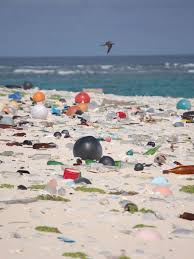

In [10]:
img_url = '/content/plastic_dataset/Plastic on Sand/Dirt/images (30).jpg'

# Open the image correctly
raw_image = Image.open(img_url).convert('RGB')

# Resize and display the image
display(raw_image)
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

In [11]:
model.generate({"image": image, "prompt": "Question: Is there any plastic?, how many recyceable plastic items are there?  Answer:"})

['plastic bottles, plastic bags, plastic bottles, plastic bags, plastic bottles, plastic bags, plastic bottles, plastic bottles, plastic bottles, plastic bottles,']

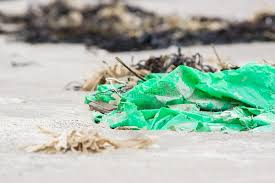

In [13]:
img_url = '/content/plastic_dataset/Plastic on Sand/Dirt/images (43).jpg'

# Open the image correctly
raw_image = Image.open(img_url).convert('RGB')

# Resize and display the image
display(raw_image)
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

In [14]:
model.generate({"image": image, "prompt": "Question: What kind of plastic is there in image if any and also tell if it is recycleable or not?  Answer:"})

['green plastic bag']

In [15]:
model.generate({"image": image, "prompt": "Question: What kind of plastic is there in image if any and also tell if it is recycleable or not?  Answer:"})

['plastic bags, plastic bottles, plastic bags, plastic bottles, plastic bottles, plastic bottles, plastic bottles, plastic bottles, plastic bottles, plastic bottles,']

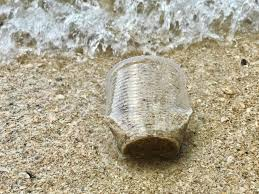

In [16]:
img_url = '/content/plastic_dataset/Plastic on Sand/Dirt/images (8).jpg'

# Open the image correctly
raw_image = Image.open(img_url).convert('RGB')

# Resize and display the image
display(raw_image)
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

In [17]:
model.generate({"image": image, "prompt": "Question: What kind of plastic is there in image if any and also tell if it is recycleable or not?  Answer:"})

['a plastic bottle is on the beach and it is not recycleable']

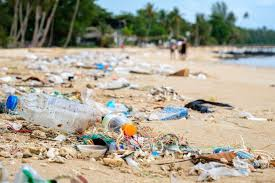

In [18]:
img_url = '/content/plastic_dataset/Plastic on Sand/Dirt/images (38).jpg'

# Open the image correctly
raw_image = Image.open(img_url).convert('RGB')

# Resize and display the image
display(raw_image)
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

In [19]:
model.generate({"image": image, "prompt": "Question: What kind of plastic is there in image if any and also tell if it is recycleable or not?  Answer:"})

['plastic bottles, plastic bags, plastic bags, plastic bottles, plastic bottles, plastic bags, plastic bags, plastic bags, plastic bags, plastic bags,']

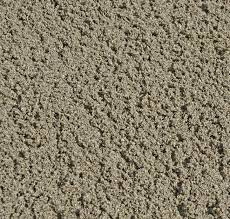

In [20]:
img_url = '/content/plastic_dataset/Plastic on Sand/Clean/download (8).jpg'

# Open the image correctly
raw_image = Image.open(img_url).convert('RGB')

# Resize and display the image
display(raw_image)
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

In [21]:
model.generate({"image": image, "prompt": "Question: What kind of plastic is there in image if any and also tell if it is recycleable or not?  Answer:"})

['recycled plastic, recycled plastic bags, recycled plastic bottles, recycled plastic bags, recycled plastic bottles, plastic bottles, recycled plastic']

In [22]:
model.generate({"image": image})

['a close up of a sand textured surface']

In [23]:
model.generate({"image": image, "prompt": "Question: is there any plastic in this image ?  Answer:"})

['no']

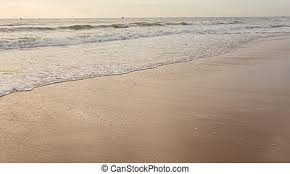

In [24]:
img_url = '/content/plastic_dataset/Plastic on Sand/Clean/images (53).jpg'

# Open the image correctly
raw_image = Image.open(img_url).convert('RGB')

# Resize and display the image
display(raw_image)
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

In [25]:
model.generate({"image": image, "prompt": "Question: is there any plastic in this image ?  Answer:"})

['no']

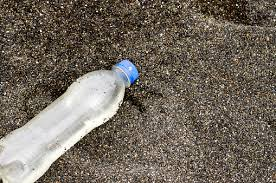

['yes there is a plastic bottle in the sand']

In [26]:
img_url = '/content/plastic_dataset/Plastic on Sand/Dirt/images (31).jpg'

# Open the image correctly
raw_image = Image.open(img_url).convert('RGB')

# Resize and display the image
display(raw_image)
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
model.generate({"image": image, "prompt": "Question: is there any plastic in this image and how many plastic items are there?  Answer:"})

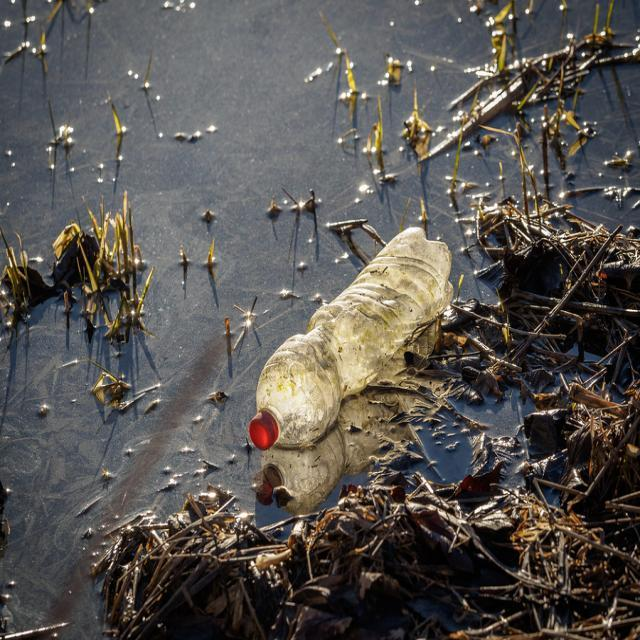

['yes there is a plastic bottle in the water']

In [27]:
img_url = '/content/Ocean-Plastics-Waste-Detection---Float-Plastics-8/test/images/Image_168_jpg.rf.367511867b96568158403d13cd9e16b9.jpg'

# Open the image correctly
raw_image = Image.open(img_url).convert('RGB')

# Resize and display the image
display(raw_image)
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
model.generate({"image": image, "prompt": "Question: is there any plastic in this image and how many plastic items are there?  Answer:"})

In [29]:
model.generate({"image": image, "prompt": "Question: how many plastic items are there in the image?  Answer:"})

['two']

In [30]:
model.generate({"image": image, "prompt": "Question: list the plastic items in the image?  Answer:"})

['plastic bottle']

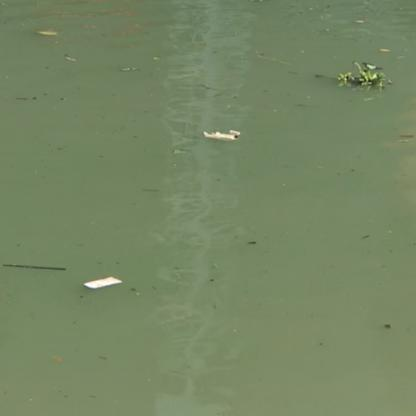

['yes there is plastic in this image and there are a few plastic items']

In [32]:
img_url = '/content/Ocean-Plastics-Waste-Detection---Float-Plastics-8/test/images/r106_PNG_jpg.rf.2bf52c5c8658a13268617fdcd05253bd.jpg'
# Open the image correctly
raw_image = Image.open(img_url).convert('RGB')

# Resize and display the image
display(raw_image)
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
model.generate({"image": image, "prompt": "Question: is there any plastic in this image and how many plastic items are there?  Answer:"})

In [33]:
model.generate({"image": image, "prompt": "Question: list the plastic items in the image?  Answer:"})

['plastic bottles, plastic bags, plastic bottles, plastic bags, plastic bottles, plastic bottles, plastic bottles, plastic bottles, plastic bottles, plastic bottles,']

In [7]:
!kaggle datasets download -d rogeriovaz/plastic-on-sand-image-classification
!unzip -q plastic-on-sand-image-classification.zip -d /content/plastic_dataset


Dataset URL: https://www.kaggle.com/datasets/rogeriovaz/plastic-on-sand-image-classification
License(s): CC0-1.0
plastic-on-sand-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)
